In [1]:
library(statsr)
library(dplyr)
library(shiny)
library(ggplot2)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
data(ames)

In [8]:
str(ames)

Classes 'tbl_df', 'tbl' and 'data.frame':	2930 obs. of  82 variables:
 $ Order          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ PID            : int  526301100 526350040 526351010 526353030 527105010 527105030 527127150 527145080 527146030 527162130 ...
 $ area           : int  1656 896 1329 2110 1629 1604 1338 1280 1616 1804 ...
 $ price          : int  215000 105000 172000 244000 189900 195500 213500 191500 236500 189000 ...
 $ MS.SubClass    : int  20 20 20 20 60 60 120 120 120 60 ...
 $ MS.Zoning      : Factor w/ 7 levels "A (agr)","C (all)",..: 6 5 6 6 6 6 6 6 6 6 ...
 $ Lot.Frontage   : int  141 80 81 93 74 78 41 43 39 60 ...
 $ Lot.Area       : int  31770 11622 14267 11160 13830 9978 4920 5005 5389 7500 ...
 $ Street         : Factor w/ 2 levels "Grvl","Pave": 2 2 2 2 2 2 2 2 2 2 ...
 $ Alley          : Factor w/ 2 levels "Grvl","Pave": NA NA NA NA NA NA NA NA NA NA ...
 $ Lot.Shape      : Factor w/ 4 levels "IR1","IR2","IR3",..: 1 4 1 4 1 1 4 1 1 4 ...
 $ Land.Contour   : Factor w/ 

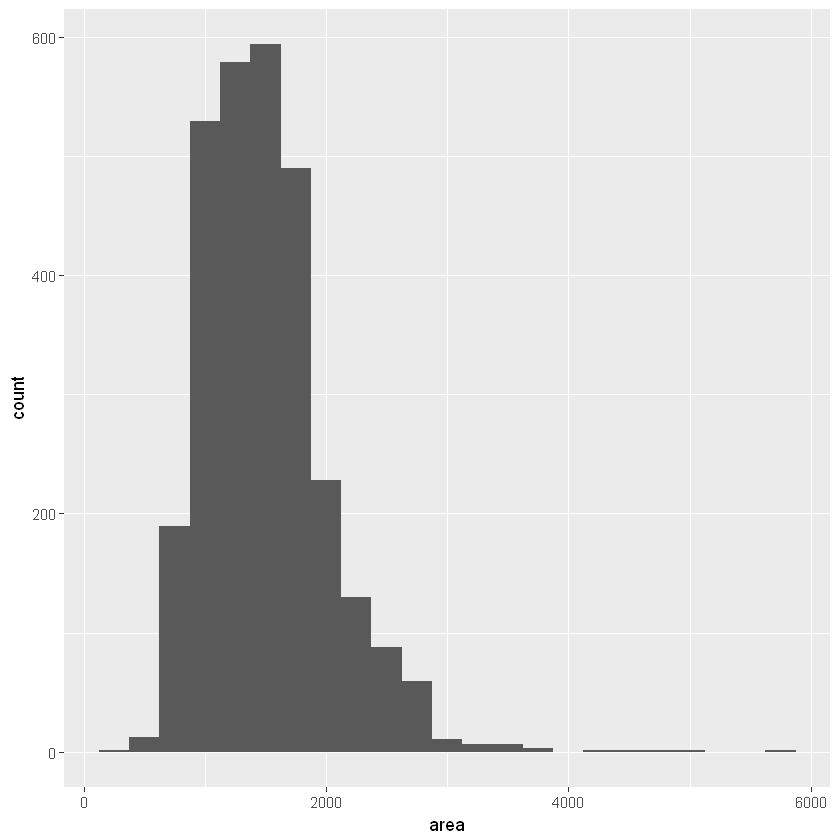

In [9]:
ggplot(ames, aes(area)) +
geom_histogram(binwidth = 250)

In [10]:
ames %>%
summarize(mu = mean(area), pop_med = median(area), sigma = sd(area),
         pop_iqr = IQR(area), pop_min = min(area), pop_max = max(area),
         pop_q1 = quantile(area, 0.25),
         pop_q3 = quantile(area, 0.75))

mu,pop_med,sigma,pop_iqr,pop_min,pop_max,pop_q1,pop_q3
1499.69,1442,505.5089,616.75,334,5642,1126,1742.75


In [11]:
samp1 <- ames %>%
sample_n(size = 50)

In [12]:
samp1

Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
1512,908276140,1204,100000,80,RL,62,7692,Pave,NA,...,0,0,NA,NA,NA,0,11,2008,WD,Abnorml
1674,527427160,1337,155000,120,RH,33,4113,Pave,NA,...,0,0,NA,NA,NA,0,7,2007,WD,Normal
577,533254050,1740,241600,20,RL,110,15417,Pave,NA,...,0,0,NA,NA,NA,0,6,2009,WD,Normal
2056,905104090,894,125000,20,RL,99,7094,Pave,NA,...,0,0,NA,MnPrv,NA,0,5,2007,WD,Normal
2465,528480100,1553,186500,60,FV,65,8125,Pave,NA,...,0,0,NA,NA,NA,0,3,2006,New,Partial
2466,528480110,1716,200825,60,FV,65,8125,Pave,NA,...,0,0,NA,NA,NA,0,2,2006,WD,Normal
690,535476240,1045,127000,20,RL,80,7936,Pave,NA,...,0,0,NA,NA,NA,0,4,2009,WD,Normal
2040,903458060,1196,109900,30,RM,40,4800,Pave,NA,...,0,0,NA,NA,NA,0,7,2007,WD,Normal
1908,534478140,1920,137000,90,RL,95,11345,Pave,NA,...,0,0,NA,NA,NA,0,7,2007,WD,Normal
2614,535403200,864,120000,20,RL,60,7332,Pave,NA,...,0,0,NA,NA,NA,0,10,2006,WD,Abnorml


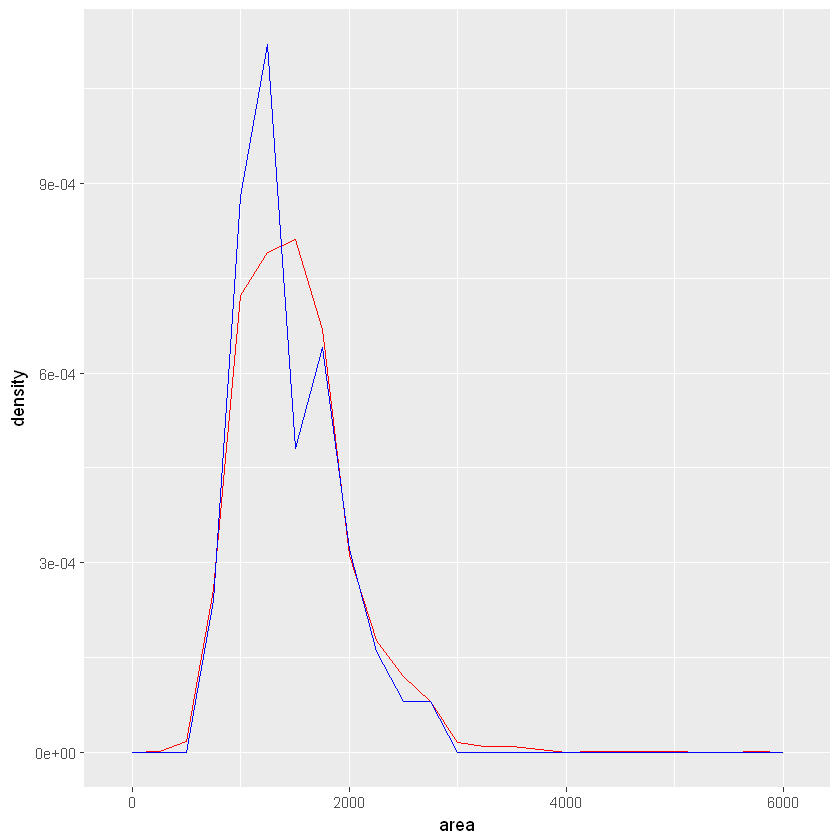

In [24]:
ggplot() +
geom_freqpoly(data = ames, aes(area, ..density..), binwidth = 250, color = 'red') +
geom_freqpoly(data = samp1, aes(area, ..density..), binwidth = 250, color = 'blue')

In [25]:
samp1 %>%
summarize(x_bar = mean(area))

x_bar
1434.46


In [27]:
ames %>%
sample_n(size = 50) %>%
summarize(x_bar = mean(area))

x_bar
1434.08


In [42]:
sample_means50 <- ames %>%
rep_sample_n(size = 50, reps = 15000, replace = TRUE) %>%
summarize(x_bar = mean(area))

In [41]:
ames %>%
rep_sample_n(size = 50, reps = 15000, replace = TRUE) %>%
str()

Classes 'grouped_df', 'tbl_df', 'tbl' and 'data.frame':	750000 obs. of  83 variables:
 $ replicate      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Order          : int  2473 2742 1829 2179 762 2877 1860 1144 960 709 ...
 $ PID            : int  531375060 905452140 532477040 908152280 904100190 910207110 533254130 531385060 916382100 902205010 ...
 $ area           : int  1131 1855 2167 1090 704 951 1262 1677 2036 612 ...
 $ price          : int  132000 136900 294000 157000 88750 106500 181500 190500 410000 45000 ...
 $ MS.SubClass    : int  20 50 60 20 20 30 20 60 20 30 ...
 $ MS.Zoning      : Factor w/ 7 levels "A (agr)","C (all)",..: 6 6 6 6 6 7 6 6 6 7 ...
 $ Lot.Frontage   : int  63 75 NA 60 50 50 80 65 113 50 ...
 $ Lot.Area       : int  13072 9525 17542 7024 4280 8765 9600 8450 13438 5925 ...
 $ Street         : Factor w/ 2 levels "Grvl","Pave": 2 2 2 2 2 2 2 2 2 2 ...
 $ Alley          : Factor w/ 2 levels "Grvl","Pave": NA NA NA NA NA 1 NA NA NA NA ...
 $ Lot.Shape      : Factor w/ 4 le

In [35]:
sample_means50 %>%
filter(replicate == 2) %>%
summarize(x_bar = )

Classes 'grouped_df', 'tbl_df', 'tbl' and 'data.frame':	50 obs. of  83 variables:
 $ replicate      : int  2 2 2 2 2 2 2 2 2 2 ...
 $ Order          : int  2368 2693 2611 543 2711 1069 1724 1099 2466 1079 ...
 $ PID            : int  527450460 903454020 535402230 531376090 905103180 528178090 528186090 528315060 528480110 528188150 ...
 $ area           : int  1030 819 1207 1450 934 2690 1561 2199 1716 1626 ...
 $ price          : int  116000 72000 147000 224243 132000 370000 277500 284500 200825 154000 ...
 $ MS.SubClass    : int  160 30 20 20 80 60 120 75 60 160 ...
 $ MS.Zoning      : Factor w/ 7 levels "A (agr)","C (all)",..: 7 7 6 6 6 6 6 6 3 6 ...
 $ Lot.Frontage   : int  21 50 77 61 80 112 60 84 65 36 ...
 $ Lot.Area       : int  1890 9000 9510 7328 10366 16451 7313 9660 8125 2448 ...
 $ Street         : Factor w/ 2 levels "Grvl","Pave": 2 2 2 2 2 2 2 2 2 2 ...
 $ Alley          : Factor w/ 2 levels "Grvl","Pave": NA NA NA NA NA NA NA NA NA NA ...
 $ Lot.Shape      : Factor w/ 4

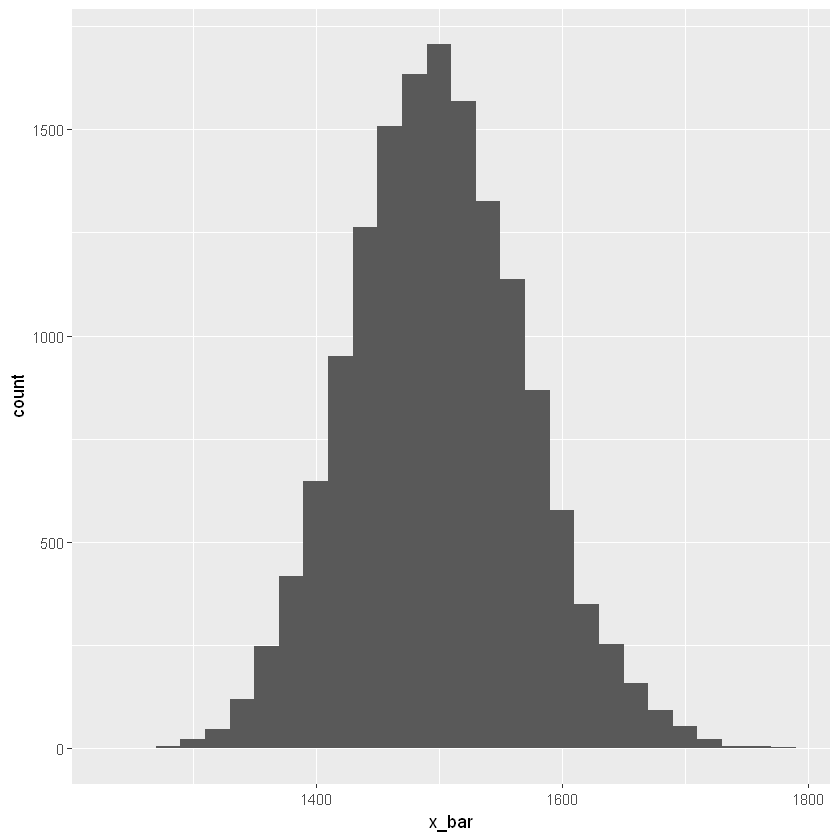

In [45]:
ggplot(sample_means50, aes(x_bar)) +
geom_histogram(binwidth = 20)

In [47]:
sample_means50 %>%
summarize(mean = mean(x_bar), median = median(x_bar))

mean,median
1499.41,1497.2


In [48]:
dim(sample_means50)

[1] 15000     2

In [49]:
sample_means_small <- ames %>%
rep_sample_n(size = 10, reps = 25, replace = TRUE) %>%
summarize(x_bar = mean(area))

In [50]:
dim(sample_means_small)

[1] 25  2

In [51]:
sample_means_small

replicate,x_bar
1,1731.2
2,1462.2
3,1598.8
4,1585.6
5,1496.0
6,1585.3
7,1398.1
8,1425.9
9,1336.4
10,1577.7


In [52]:
s10 <- ames %>%
rep_sample_n(size = 10, reps = 5000, replace = TRUE) %>%
summarize(x_bar = mean(area))

In [53]:
s50 <- ames %>%
rep_sample_n(size = 50, reps = 5000, replace = TRUE) %>%
summarize(x_bar = mean(area))

In [54]:
s100 <- ames %>%
rep_sample_n(size = 100, reps = 5000, replace = TRUE) %>%
summarize(x_bar = mean(area))

In [58]:
s50

replicate,x_bar
1,1522.44
2,1572.64
3,1642.72
4,1670.70
5,1596.36
6,1618.22
7,1510.88
8,1510.54
9,1576.92
10,1582.20


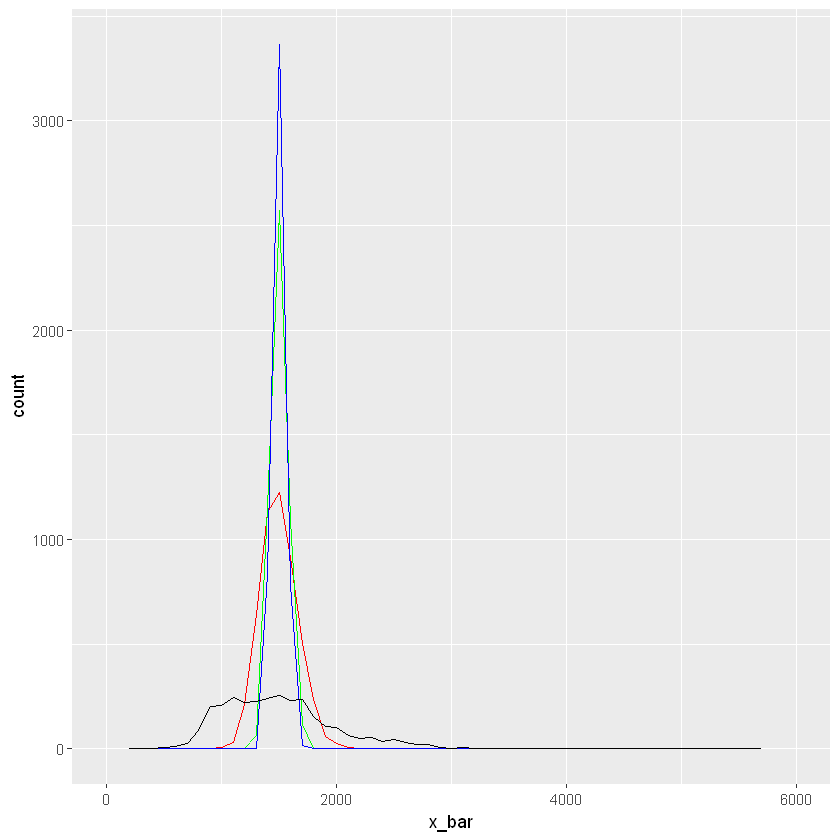

In [70]:
ggplot() +
geom_freqpoly(data = s10, aes(x_bar), binwidth = 100, color = 'red') +
geom_freqpoly(data = s50, aes(x_bar), binwidth = 100, color = 'green') +
geom_freqpoly(data = s100, aes(x_bar), binwidth = 100, color = 'blue') +
geom_freqpoly(data = ames, aes(area), binwidth = 100) +
coord_cartesian(xlim = c(0, 6000))

In [71]:
price50 <- ames %>%
sample_n(size = 50) %>%
summarize(x_bar = mean(price))

In [72]:
price50

x_bar
189239.3


In [82]:
sample_means50 <- ames %>%
rep_sample_n(size = 50, reps = 5000, replace = TRUE) %>%
summarize(x_bar = mean(price))

In [74]:
str(price50x5000)

Classes 'tbl_df', 'tbl' and 'data.frame':	5000 obs. of  2 variables:
 $ replicate: int  1 2 3 4 5 6 7 8 9 10 ...
 $ x_bar    : num  169153 178853 189167 165164 170007 ...


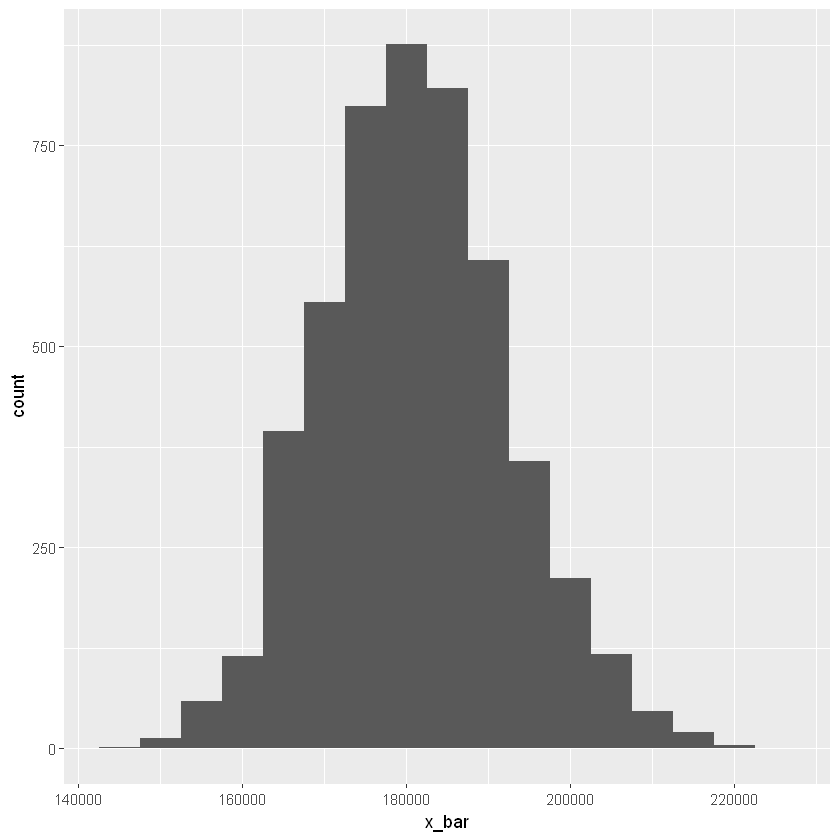

In [76]:
price50x5000 %>%
ggplot(aes(x_bar)) +
geom_histogram(binwidth = 5000)

In [77]:
mean(price50x5000$x_bar)

[1] 181053.8

In [78]:
mean(ames$price)

[1] 180796.1

In [79]:
sample_means150 <- ames %>%
rep_sample_n(size = 150, reps = 5000, replace = TRUE) %>%
summarize(x_bar = mean(price))

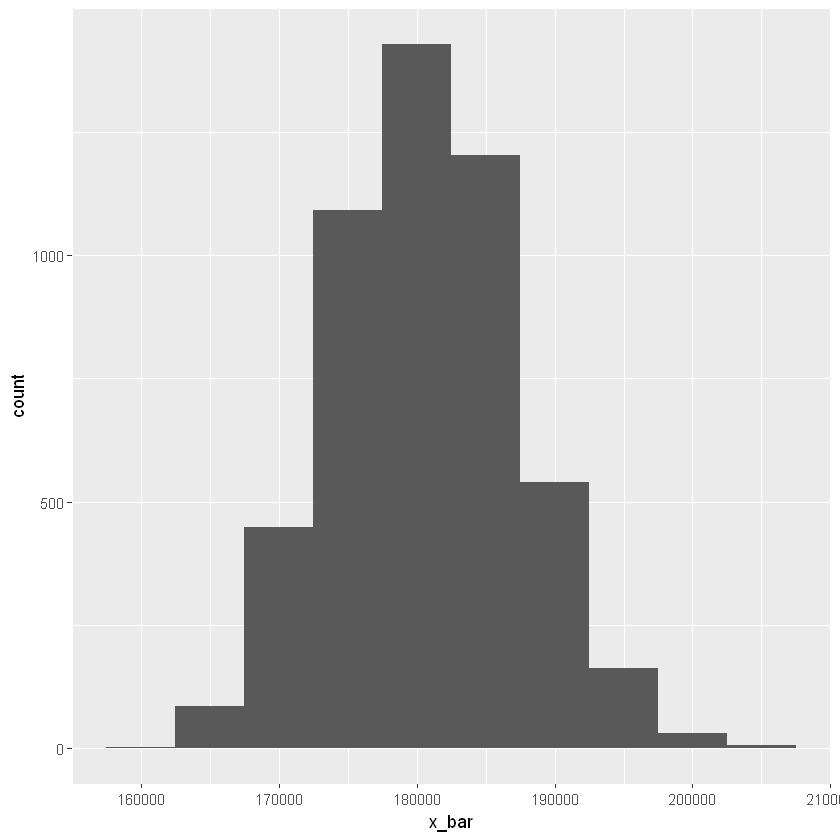

In [80]:
sample_means150 %>%
ggplot(aes(x_bar)) +
geom_histogram(binwidth = 5000)

In [81]:
mean(sample_means150$x_bar)

[1] 180647

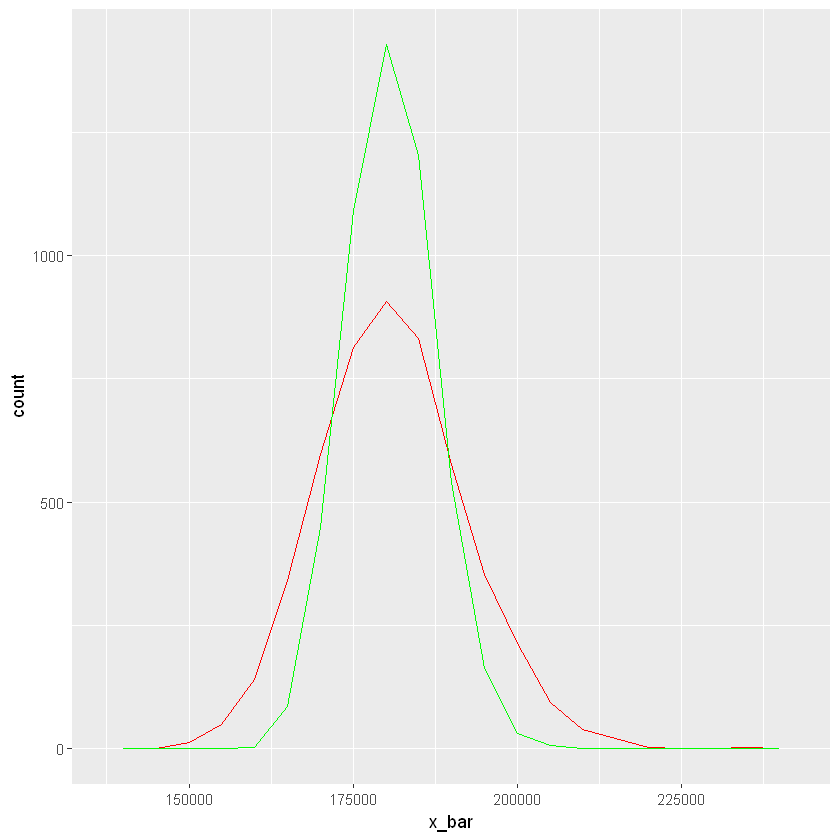

In [84]:
ggplot() +
geom_freqpoly(data = sample_means50, aes(x_bar), binwidth = 5000, color = 'red') +
geom_freqpoly(data = sample_means150, aes(x_bar), binwidth = 5000, color = 'green')

In [88]:
ames %>%
sample_n(size = 15) %>%
summarize(mean_price = mean(price))

mean_price
180375.2


In [89]:
sample_means15 <- ames %>%
rep_sample_n(size = 15, reps = 2000, replace = TRUE) %>%
summarize(x_bar = mean(price))

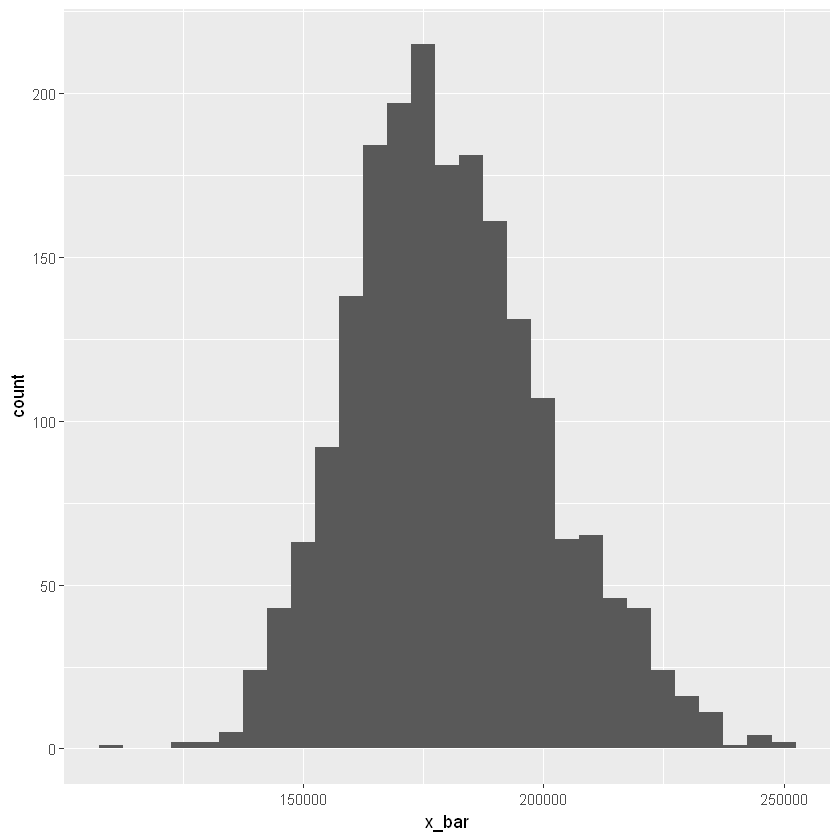

In [93]:
ggplot(sample_means15, aes(x_bar)) +
geom_histogram(binwidth = 5000)

In [92]:
mean(sample_means15$x_bar)

[1] 180379.5

In [94]:
mean(ames$price)

[1] 180796.1